In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
from skimage.filters import gaussian,laplace,threshold_otsu
import scipy.ndimage
import skimage
import math
from scipy import ndimage

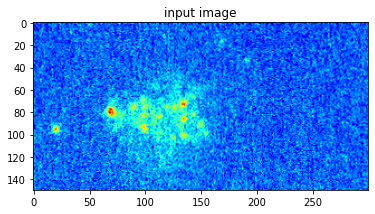

In [4]:
#imfile = '/content/drive/MyDrive/206/A4/img_A4_P1.bmp'
imfile = '/content/img_A4_P1.bmp'
I = io.imread(imfile,as_gray=True)
plt.imshow(I,cmap='jet'),plt.title('input image')
plt.show()

# Create a Laplacian-of-Gaussian Volume

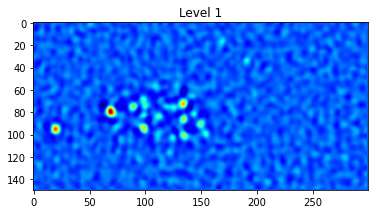

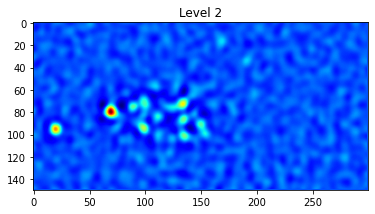

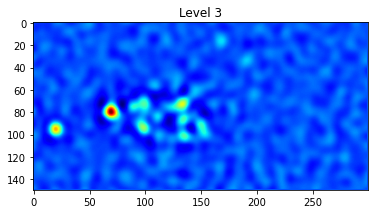

In [5]:
"""add your code here"""
#resource: https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian
#resource: https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.laplace
sp = I.shape
h = sp[0]   #height(rows) of image
w = sp[1]   #width(colums) of image
#Choose 3 different sigma values in order to get the best results
sigma1 = 3
sigma2 = 4
sigma3 = 5
#With each level, we first compute the kernel size k = 2 * round(3 * sigma) + 1
#And then use skimage.filters.gaussian followed by skimage.filters.laplace to apply the LoG filter
#And show the results of each level 
#level 1
k1 = int(2 * round(3 * sigma1) + 1)
I1 = gaussian(I, sigma = sigma1)
I1 = laplace(I1, ksize = k1)
plt.imshow(I1, cmap='jet')
plt.title('Level 1')
plt.show()
#level 2
k2 = int(2 * round(3 * sigma2) + 1)
I2 = gaussian(I, sigma = sigma2)
I2 = laplace(I2, ksize = k2)
plt.imshow(I2, cmap='jet')
plt.title('Level 2')
plt.show()
#level 3
k3 = int(2 * round(3 * sigma3) + 1)
I3 = gaussian(I, sigma = sigma3)
I3 = laplace(I3, ksize = k3)
plt.imshow(I3, cmap='jet')
plt.title('Level 3')
plt.show()
#Then we need to store all these 3 levels of the volume
#in a single numpy array whose size is h x w x 3
#Initialize the array L
L = np.zeros((h, w, 3), np.float64)
L[:, :, 0] = I1
L[:, :, 1] = I2
L[:, :, 2] = I3

#Obtain a rough estimate of blob locations

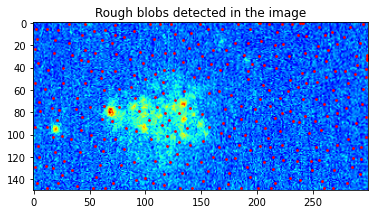

In [6]:
"""add your code here"""
#resource: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.filters.minimum_filter.html
#By using the scipy function scipy.ndimage.filters.minimum_filter
#The minimum value of this area is detected within the LoG amount
min = ndimage.minimum_filter(L, size = 10)
#the scipy function returns the actual value of the detected minimum value, not its position
#so additional steps are required to convert its output into the desired binary image
p = (L == min)
#resource: https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.sum.html
#Using np.sum to calculate the sum of the corresponding pixels in the 3 channels
#this 3D binary image is folded into a channel image
sum_p = np.sum(p, axis=2)
#resource: https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html
#Display the positions of all non-zero entries in this collapsed array overlaid on the input image in red dots using np.nonzero
red = np.nonzero(sum_p)
#resource: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#resource: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
#Using plt.scatter to show the result
plt.scatter(red[1], red[0], s = 3, c = 'r', marker = 'o')
plt.imshow(I, cmap='jet')
plt.title('Rough blobs detected in the image')
plt.show()

# Refine the blobs using Otsu thresholding

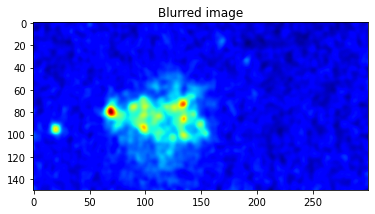

In [7]:
"""add your code here"""
#Using skimage.filters.gaussian to get the blur image
I_g = gaussian(I, sigma=2)
plt.imshow(I_g, cmap='jet')
plt.title('Blurred image')
plt.show()


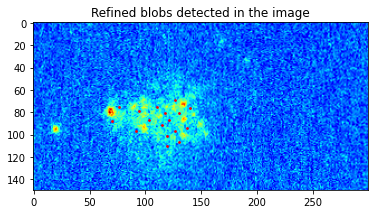

In [17]:

"""add your code here"""
#resource: https://scikit-image.org/docs/dev/api/skimage.html#skimage.img_as_ubyte
#Using skimage.img_as_ubyte convert the gaussian blurred image to 8-bit unsigned integer format
img_as_ubyte(I_g)
#resource: https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu
#resource: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html
#Using skimage.filters.threshold_otsu to get the optimal threshold of the image
#Delete all the minimum values in the output image of "obtain a rough estimate of spot position"
#whose pixel value is less than the obtained threshold
threshold = threshold_otsu(I_g)
binary = I_g >= threshold
new_red = np.nonzero(sum_p * binary)
#Using plt.scatter to show the result
plt.scatter(new_red[1], new_red[0], s = 3, c = 'r', marker = 'o')
plt.imshow(I, cmap='jet')
plt.title('Refined blobs detected in the image')
plt.show()